# Ejercicio 1

## Parte 1

Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con $\mu$ = 1.78 m y $\sigma$ = 0.1 m. 

Dibuja la densidad de frecuencia y la densidad de probabilidad por separado. 

Compara μ y σ con la media muestral y la varianza muestral.

In [2]:
mu <- 1.78
sigma <- 0.1
N <- 10000

muestra <- rnorm(N, mu, sigma)

print(paste("La media muestral es", mean(muestra)))
print(paste("La varianza muestral es", var(muestra)))

[1] "La media muestral es 1.7804618336145"
[1] "La varianza muestral es 0.00995473538254584"


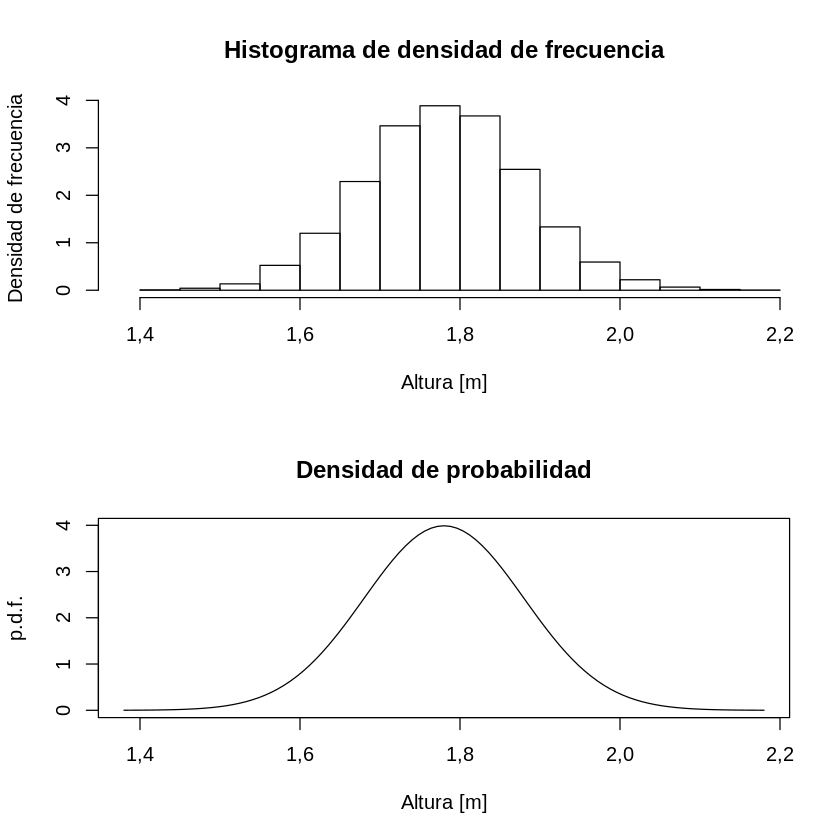

In [3]:
par(mfrow=c(2,1)) 

# frecuencias
hist(muestra, freq = F, xlim = c(1.38, 2.18),
     xlab = "Altura [m]",
     ylab = "Densidad de frecuencia",
     main = "Histograma de densidad de frecuencia")

# p.d.f
curve(dnorm(x,mu,sigma), 1.38, 2.18,
     xlab = "Altura [m]",
     ylab = "p.d.f.",
     main = "Densidad de probabilidad")


## Parte 2

Considerar la distribución de probabilidad anterior y el estimador media muestral para una muestra de tamaño N (T$_N$). 

Generar un número alto M = 10000 de pseudo-muestras y estudiar la distribución (μ-T$_N$), para N = 10, 100, 1000, 10000, 100000. 

Calcular el valor esperado en cada caso (considerando el valor esperado como el promedio a los M = 10000 psuedo-experimentos) y dibujar el resultado en función de N. 

Repetir el mismo procedimiento pero calcular el valor esperado de la varianza (considerando de nuevo las M = 10000 psedo-muestras).

In [4]:
# Número de pseudo-muestras
M <- 10000

In [5]:
# Función para producir las muestras y extraer la media de cada una
mean.generator <- function(sample_size){
    return(mean(rnorm(sample_size,mu,sigma)))
}

# Función para producir las muestras y extraer la varianza de cada una
var.generator <- function(sample_size){
    return(var(rnorm(sample_size,mu,sigma)))
}

# Función para producir las muestras y extraer la mediana de cada una
median.generator <- function(sample_size){
    return(median(rnorm(sample_size,mu,sigma)))
}

### Media muestral

Producimos las muestras y guardamos la media de cada una de ellas.

In [6]:
N = c(10,100,1000,10000,100000)

# Cada entrada de super.mean.vector
# guarda las medias muestrales
# de las 10000 muestras

super.mean.vector <- lapply(N, function(x){
    replicate(M, mean.generator(x))
})

Guardamos el valor medio y la varianza de las medias muestrales.

In [7]:
# Cada entrada de mean.vec guarda
# la media de las 10000 media muestrales
mean.vec <- c()

# Cada entrada de var.vec guarda
# la varianza de las 10000 medias muestrales
var.vec  <- c()

for (n in 1:length(N)){
    mean.vec <- c(mean.vec, mean(super.mean.vector[[n]]))
    var.vec  <- c(var.vec,  var(super.mean.vector[[n]]))
    print(paste("El valor medio de la media muestral de 10000 muestras de", N[n], "personas es", format(round(mean.vec[n], 6), nsmall = 6)))
    print(paste("La varianza de la media muestral de 10000 muestras de", N[n], "personas es", format(round(var.vec[n], 10), nsmall = 10)))
    print("")
}

[1] "El valor medio de la media muestral de 10000 muestras de 10 personas es 1,779888"
[1] "La varianza de la media muestral de 10000 muestras de 10 personas es 0,0010185516"
[1] ""
[1] "El valor medio de la media muestral de 10000 muestras de 100 personas es 1,779969"
[1] "La varianza de la media muestral de 10000 muestras de 100 personas es 9,88369e-05"
[1] ""
[1] "El valor medio de la media muestral de 10000 muestras de 1000 personas es 1,779869"
[1] "La varianza de la media muestral de 10000 muestras de 1000 personas es 1,00409e-05"
[1] ""
[1] "El valor medio de la media muestral de 10000 muestras de 10000 personas es 1,779995"
[1] "La varianza de la media muestral de 10000 muestras de 10000 personas es 1,018e-06"
[1] ""
[1] "El valor medio de la media muestral de 10000 muestras de 1e+05 personas es 1,780003"
[1] "La varianza de la media muestral de 10000 muestras de 1e+05 personas es 1,012e-07"
[1] ""


Dibujamos las distribucciones de ($\mu$ - $\bar{X}$).

Cada histograma tendrá 10000 entradas, una por cada muestra.

La primera observación que podemos hacer es que todos los histogramas están centrados en 0. Esto quiere decir que el valor esperado de la media muestral es $\mu$.

Por otro lado, si nos fijamos en el eje x de cada histograma, podemos ver como al crecer el tamaño de las muestras, los valores se van agrupando cada vez más cerca de 0. Esto sugiere, como hemos visto, que la media muestral de una muestra de tamaño más grande tiene una varianza más pequeña.

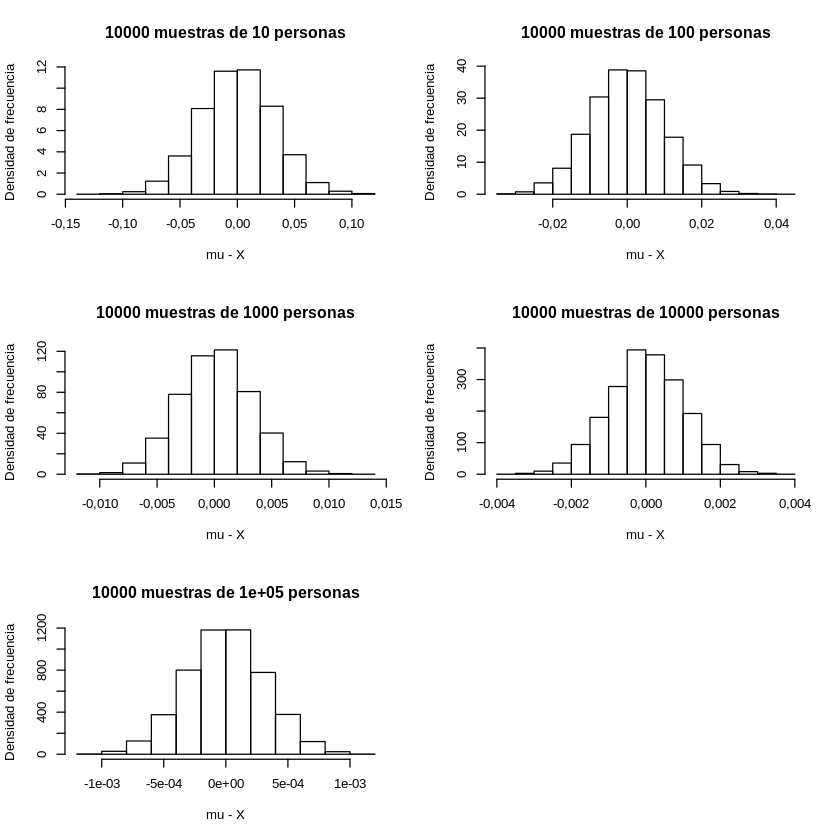

In [8]:
par(mfrow=c(3,2)) 

for (n in 1:length(N)){
    hist(mu - super.mean.vector[[n]], freq = F, #xlim = c(-0.1, 0.1),
    xlab = "mu - X",
    ylab = "Densidad de frecuencia",
    main = paste(M,"muestras de",N[n],"personas"))
    }

Dibujamos como varían la media muestral y la varianza muestral en función del tamaño de la pseudo-muestra, para facilitar la comparación.

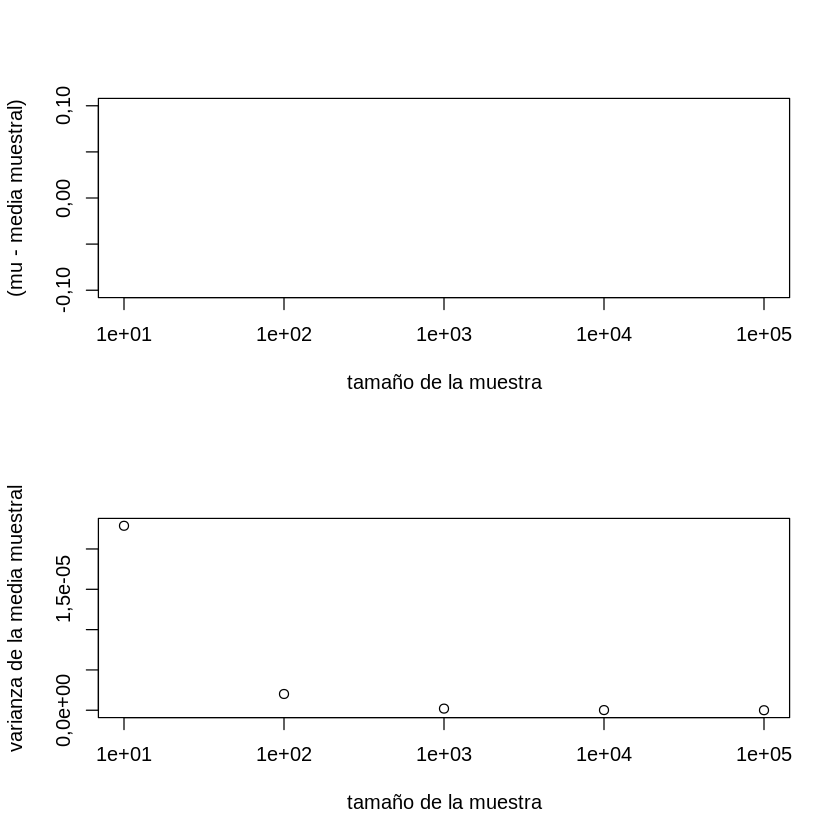

In [53]:
par(mfrow=c(2,1)) 

plot(N, mu - mean.vec, log = "x", ylim = c(-0.1,0.1),
    xlab = "tamaño de la muestra",
    ylab = "(mu - media muestral)")

plot(N, var.vec, log = c("x","y"),# ylim = c(-0.1,0.1),
    xlab = "tamaño de la muestra",
    ylab = "varianza de la media muestral")

### Varianza muestral

Producimos las muestras y guardamos la media de cada una de ellas.

In [39]:
N = c(10,100,1000,10000,100000)

# Cada entrada de super.var.vector
# guarda las varianzas muestrales
# de las 10000 muestras

super.var.vector <- lapply(N, function(x){
    replicate(M, var.generator(x))
})

In [40]:
# Cada entrada de mean.vec guarda
# la media de las 10000 varianzas muestrales
mean.vec <- c()

# Cada entrada de var.vec guarda
# la varianza de las 10000 varianzas muestrales
var.vec  <- c()

for (n in 1:length(N)){
    mean.vec <- c(mean.vec, mean(super.var.vector[[n]]))
    var.vec  <- c(var.vec,  var(super.var.vector[[n]]))
    print(paste("El valor medio de la varianza muestral de 10000 muestras de 10 personas es", format(round(mean.vec[n], 6), nsmall = 6)))
    print(paste("La varianza de la varianza muestral de 10000 muestras de 10 personas es", format(round(var.vec[n], 10), nsmall = 10)))
    print("")
}

[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,010034"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 2,28779e-05"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009985"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 2,0157e-06"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009998"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 2,022e-07"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009999"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 1,97e-08"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,010001"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 2e-09"
[1] ""


De manera similar al caso de la media muestral, vemos que la varianza muestral es un estimador no sesgado (la distribución de (s$^2$ - $\sigma^2$) está centrada en 0) y que su varianza decrece al crecer del tamaño de la muestra.

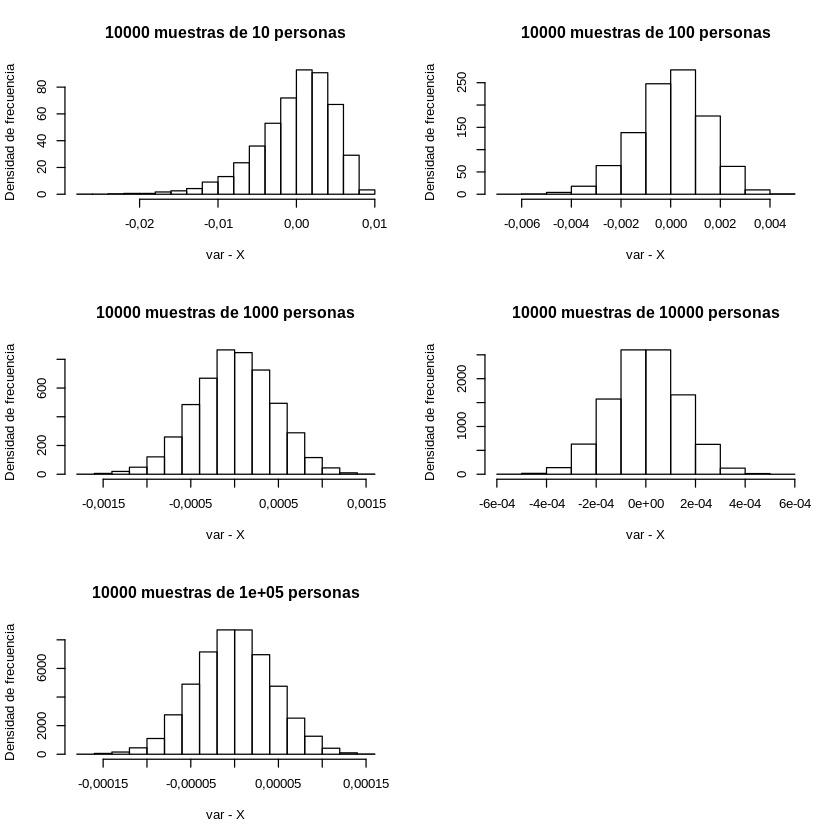

In [41]:
par(mfrow=c(3,2)) 

for (n in 1:length(N)){
    hist(sigma*sigma - super.var.vector[[n]], freq = F, #xlim = c(-0.01, 0.01),
    xlab = "var - X",
    ylab = "Densidad de frecuencia",
    main = paste(M,"muestras de",N[n],"personas"))
    }

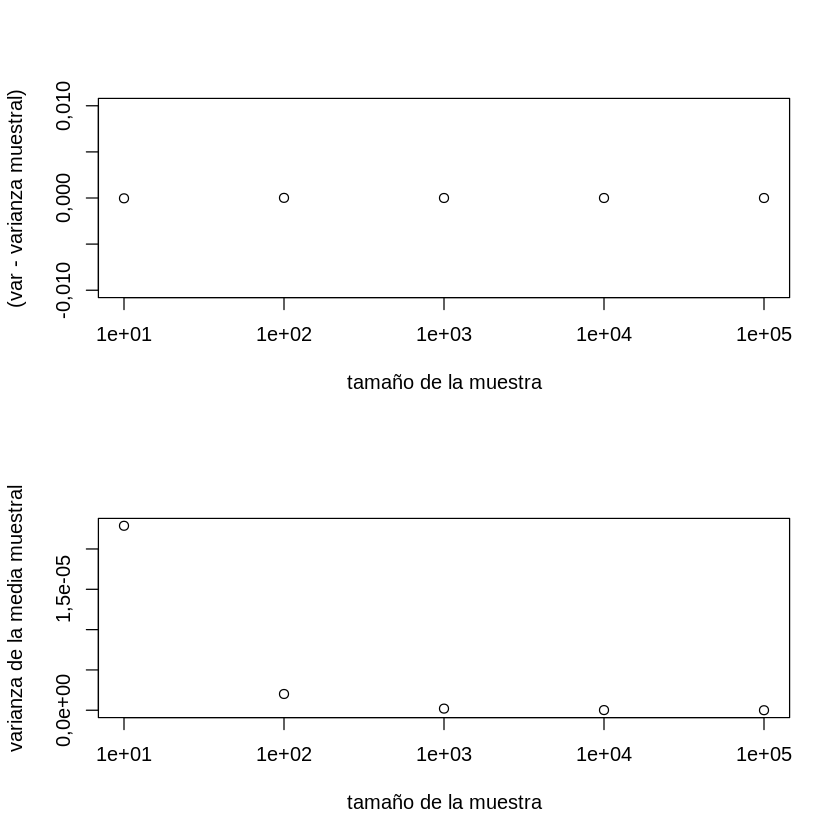

In [52]:
par(mfrow=c(2,1)) 

plot(N, sigma^2 - mean.vec, log = "x", ylim = c(-0.01,0.01),
    xlab = "tamaño de la muestra",
    ylab = "(var - varianza muestral)")

plot(N, var.vec, log = c("x","y"),# ylim = c(-0.1,0.1),
    xlab = "tamaño de la muestra",
    ylab = "varianza de la varianza muestral")


## Parte 3

Considerar la distribución de probabilidad anterior y la fórmula sesgada de la varianza. 

Generar un número alto de M = 10000 de muestras y estudiar la distribución ($\sigma$ - S$_N$), para N = 10, 100, 1000, 10000, 100000. 

Calcular el valor esperado en cada caso (usando de nuevo la media muestral) y dibujar el resultado en función de N. 

¿Se trata de un estimador consistente?

In [54]:
# Definimos una función para calcular la varianza sesgada
biased.var <- function(my.vector){
    my.mean <- mean(my.vector)
    return((sum((my.mean - my.vector)**2))/length(my.vector))
}

# Función para producir las muestras y extraer la varianza sesgada de cada una
biased.var.generator <- function(sample_size){
    return(biased.var(rnorm(sample_size,mu,sigma)))
}

In [55]:
N = c(10,100,1000,10000,100000)

# Cada entrada de super.mean.vector
# guarda las medias muestrales
# de las 10000 muestras

super.biased.var.vector <- lapply(N, function(x){
    replicate(M, biased.var.generator(x))
})

In [56]:
# Cada entrada de mean.vec guarda
# la media de las 10000 varianzas muestrales
mean.vec <- c()

# Cada entrada de var.vec guarda
# la varianza de las 10000 varianzas muestrales
var.vec  <- c()

for (n in 1:length(N)){
    mean.vec <- c(mean.vec, mean(super.biased.var.vector[[n]]))
    var.vec  <- c(var.vec,  var(super.biased.var.vector[[n]]))
    print(paste("El valor medio de la varianza muestral de 10000 muestras de 10 personas es", format(round(mean.vec[n], 6), nsmall = 6)))
    print(paste("La varianza de la varianza muestral de 10000 muestras de 10 personas es", format(round(var.vec[n], 10), nsmall = 10)))
    print("")
}

[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009048"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 1,85309e-05"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009890"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 1,9953e-06"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009989"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 1,992e-07"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,009999"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 1,98e-08"
[1] ""
[1] "El valor medio de la varianza muestral de 10000 muestras de 10 personas es 0,010000"
[1] "La varianza de la varianza muestral de 10000 muestras de 10 personas es 2e-09"
[1] ""


En el caso de la formula sesgada de la varianza muestral, vemos que efectivamente esta introduce un sesgo (la distribución de (s$^2$ - $\sigma^2$) está **no** centrada en 0, sino en $\frac{s^2}{N}$).

No obstante eso, se puede considerar un estimador consistente, ya que el sesgo disminuye hasta 0 cuando el tamaño crece hasta infinito:

$\lim_{N \rightarrow \infty}  \frac{s^2}{N} = 0 $

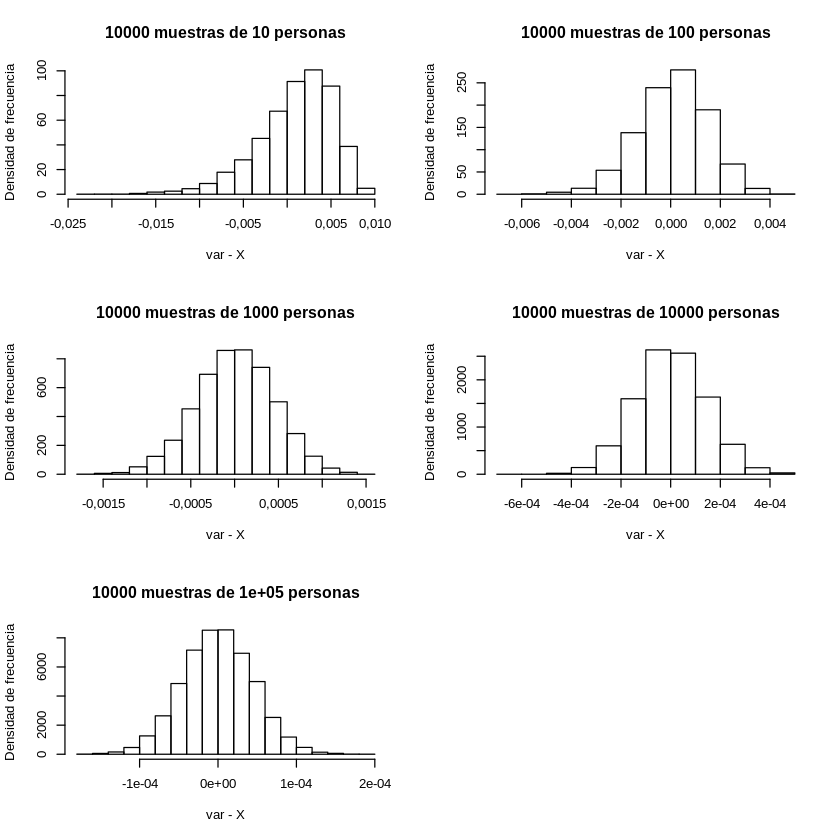

In [62]:
par(mfrow=c(3,2)) 

for (n in 1:length(N)){
    hist(sigma*sigma - super.biased.var.vector[[n]], freq = F, #xlim = c(-0.01, 0.01),
    xlab = "var - X",
    ylab = "Densidad de frecuencia",
    main = paste(M,"muestras de",N[n],"personas"))
    }

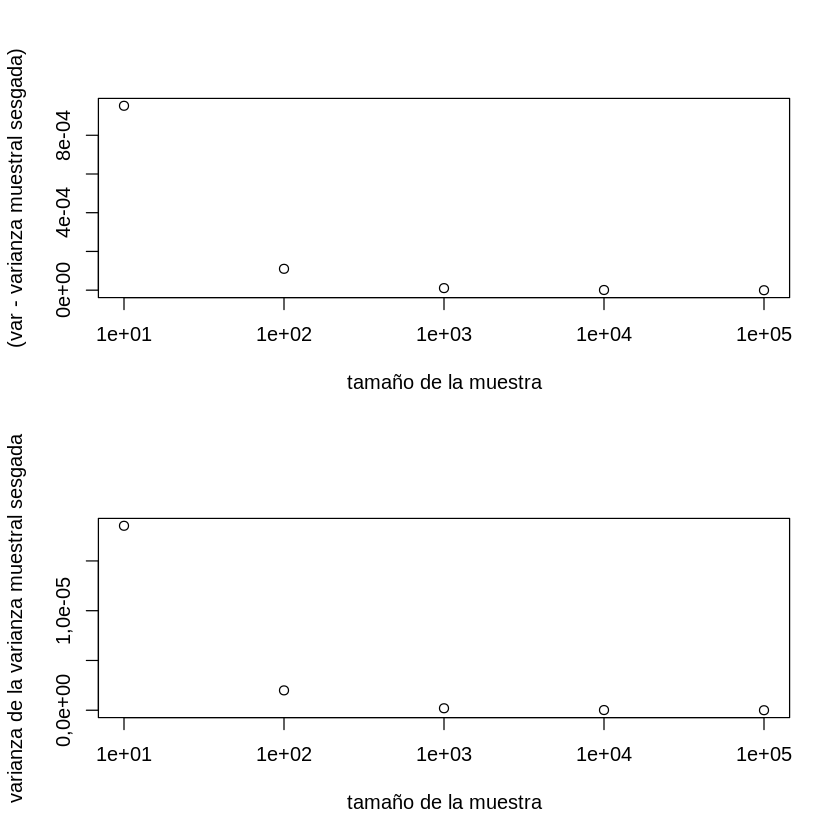

In [61]:
par(mfrow=c(2,1)) 

plot(N, sigma^2 - mean.vec, log = "x",# ylim = c(0.0,0.001),
    xlab = "tamaño de la muestra",
    ylab = "(var - varianza muestral sesgada)")

plot(N, var.vec, log = c("x","y"),
    xlab = "tamaño de la muestra",
    ylab = "varianza de la varianza muestral sesgada")

## Parte 4

Repetir el ejercicio de la parte 2 utilizando la mediana en lugar de la media. 

¿Cuál de los dos estimadores es más eficiente?

In [65]:
N = c(10,100,1000,10000,100000)

# Cada entrada de super.mean.vector
# guarda las medianas muestrales
# de las 10000 muestras

super.median.vector <- lapply(N, function(x){
    replicate(M, median.generator(x))
})

In [66]:
# Cada entrada de mean.vec guarda
# la media de las 10000 medianas muestrales
mean.vec <- c()

# Cada entrada de var.vec guarda
# la varianza de las 10000 medianas muestrales
var.vec  <- c()

for (n in 1:length(N)){
    mean.vec <- c(mean.vec, mean(super.median.vector[[n]]))
    var.vec  <- c(var.vec,  var(super.median.vector[[n]]))
    print(paste("El valor medio de la mediana muestral de 10000 muestras de", N[n], "personas es", format(round(mean.vec[n], 6), nsmall = 6)))
    print(paste("La varianza de la mediana muestral de 10000 muestras de", N[n], "personas es", format(round(var.vec[n], 10), nsmall = 10)))
    print("")
}

[1] "El valor medio de la mediana muestral de 10000 muestras de 10 personas es 1,779698"
[1] "La varianza de la mediana muestral de 10000 muestras de 10 personas es 0,0013938616"
[1] ""
[1] "El valor medio de la mediana muestral de 10000 muestras de 100 personas es 1,779669"
[1] "La varianza de la mediana muestral de 10000 muestras de 100 personas es 0,0001595988"
[1] ""
[1] "El valor medio de la mediana muestral de 10000 muestras de 1000 personas es 1,780008"
[1] "La varianza de la mediana muestral de 10000 muestras de 1000 personas es 1,51088e-05"
[1] ""
[1] "El valor medio de la mediana muestral de 10000 muestras de 10000 personas es 1,779991"
[1] "La varianza de la mediana muestral de 10000 muestras de 10000 personas es 1,584e-06"
[1] ""
[1] "El valor medio de la mediana muestral de 10000 muestras de 1e+05 personas es 1,779994"
[1] "La varianza de la mediana muestral de 10000 muestras de 1e+05 personas es 1,581e-07"
[1] ""


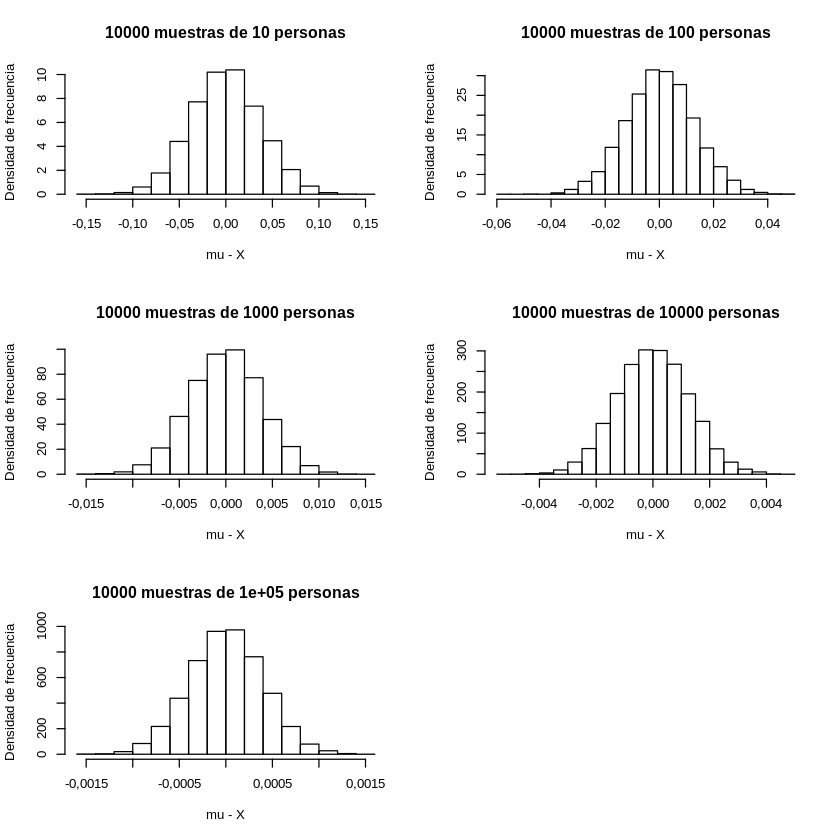

In [67]:
par(mfrow=c(3,2)) 

for (n in 1:length(N)){
    hist(mu - super.median.vector[[n]], freq = F,# xlim = c(-0.1, 0.1),
    xlab = "mu - X",
    ylab = "Densidad de frecuencia",
    main = paste(M,"muestras de",N[n],"personas"))
    }

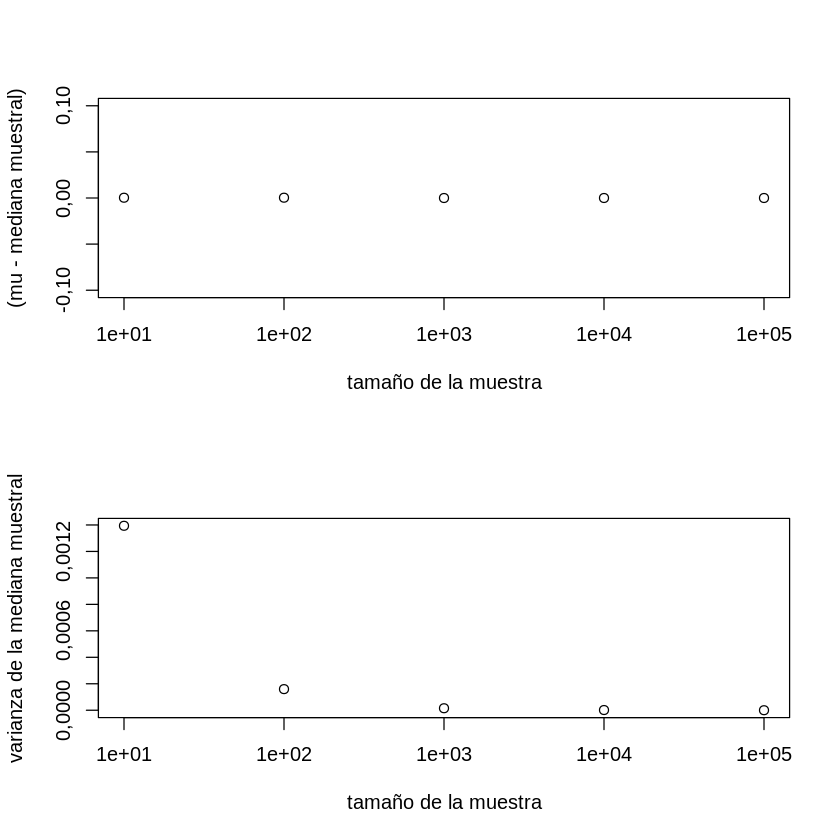

In [68]:
par(mfrow=c(2,1)) 

plot(N, mu - mean.vec, log = "x", ylim = c(-0.1,0.1),
    xlab = "tamaño de la muestra",
    ylab = "(mu - mediana muestral)")

plot(N, var.vec, log = c("x","y"),# ylim = c(-0.1,0.1),
    xlab = "tamaño de la muestra",
    ylab = "varianza de la mediana muestral")

La mediana, así como la media, es un estimador no sesgado y consistente.

Podemos observar, por otro lado, que su varianza se acerca a 0 menos rapidamente que en el caso de la media.

En este sentido, la media es un estimador más eficiente.